                                                      Glass Identification

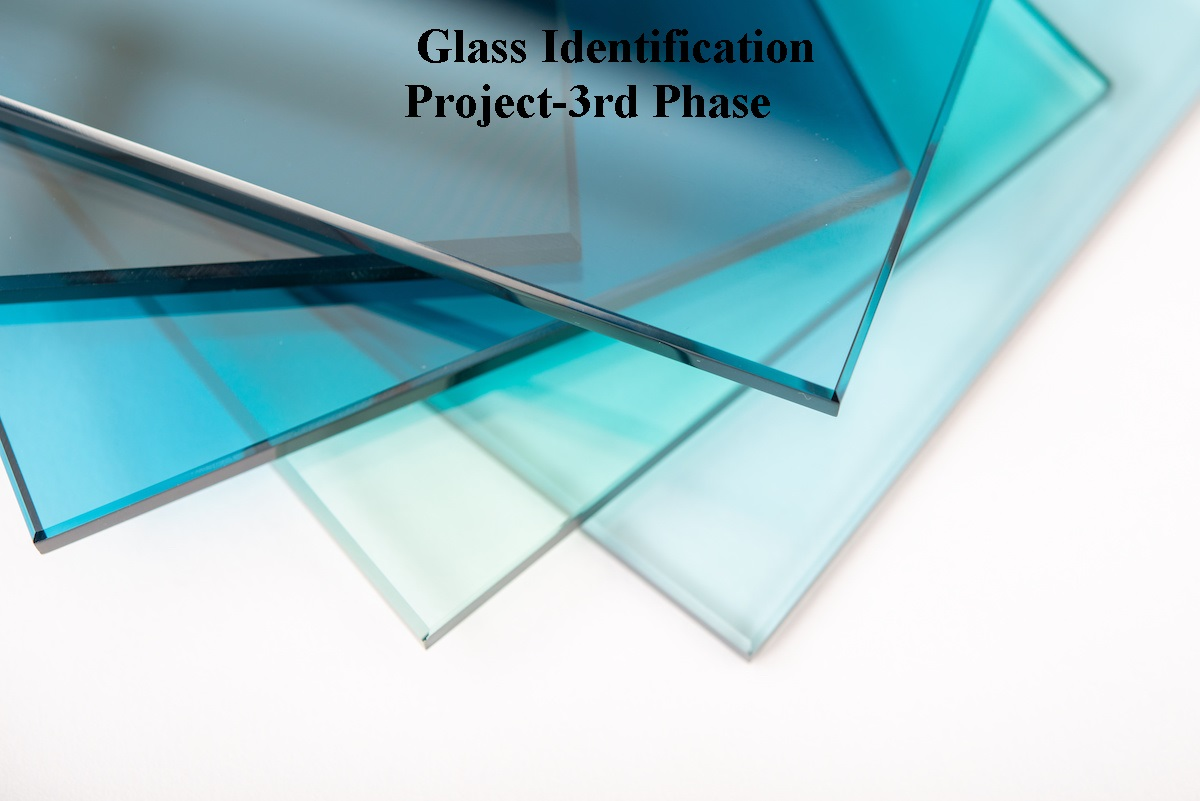

Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps


There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
glass=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

In [4]:
glass.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
glass.shape

(213, 11)


Assign labels to the columns

In [8]:
glass.columns = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

Print the updated column labels

In [7]:
print(glass.columns)

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


In [8]:
glass.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [9]:
glass.shape

(213, 11)

Checking the information about the Glass data set.

In [10]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


checking the missing values in the data set.

In [11]:
glass.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

No missing values in our data set.

Descriptive statistics

In [12]:
glass.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



Checking the value counts in glass data set

In [14]:
glass['Type of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

Data Visualisation
Let's now plot a distribution of the Types.

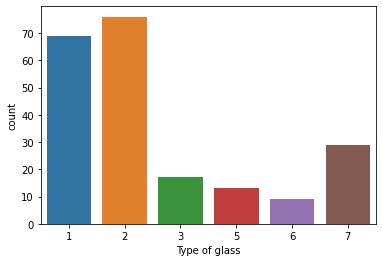

In [16]:
sns.countplot(glass['Type of glass'])
plt.show()

<AxesSubplot:>

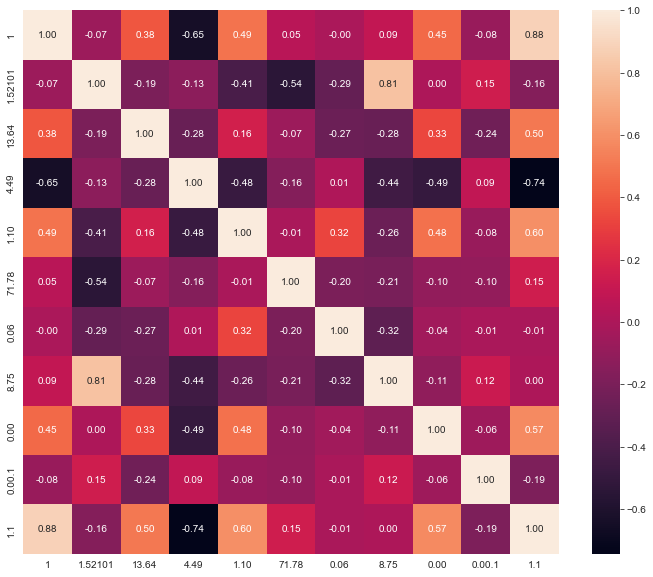

In [10]:
corr = glass.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, cmap='rocket', annot=True, fmt=".2f")

Split the feature and target variable.

In [9]:
X = glass.drop('Type of glass', axis=1)
y=glass['Type of glass']

Splitting the dataset into the Training set and Test set

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [17]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (159, 10)
Shape of X_test:  (54, 10)
Shape of y_train:  (159,)
Shape of y_test (54,)


Create a logistic regression pipeline

Define the parameters for the grid search

In [38]:
lr_pipe = Pipeline([
    ('model', LogisticRegression())
])




Best Parameters: {'model__C': 1, 'model__fit_intercept': True, 'model__max_iter': 5000, 'model__multi_class': 'auto', 'model__n_jobs': -1, 'model__random_state': 42, 'model__solver': 'newton-cg', 'model__tol': 0.0001}
Best Score: 0.9937106918238993


Define the parameters for the grid search

In [42]:
parameters = {
    'model__C': [1, 10, 100, 1000, 10000],
    'model__fit_intercept': [True],
    'model__multi_class': ['auto'],
    'model__tol': [0.0001],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__n_jobs': [-1],
    'model__max_iter': [5000],
    'model__random_state': [42]
}

Perform grid search with cross-validation

In [39]:

classifier_lr = GridSearchCV(lr_pipe, parameters, cv=3)
classifier_lr.fit(X_train, y_train.ravel())


GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', LogisticRegression())]),
             param_grid={'model__C': [1, 10, 100, 1000, 10000],
                         'model__fit_intercept': [True],
                         'model__max_iter': [5000],
                         'model__multi_class': ['auto'], 'model__n_jobs': [-1],
                         'model__random_state': [42],
                         'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'model__tol': [0.0001]})

Access the best parameters and best score

In [40]:
best_params = classifier_lr.best_params_
best_score = classifier_lr.best_score_

In [ ]:
Print the best parameters and best score

In [41]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'model__C': 1, 'model__fit_intercept': True, 'model__max_iter': 5000, 'model__multi_class': 'auto', 'model__n_jobs': -1, 'model__random_state': 42, 'model__solver': 'newton-cg', 'model__tol': 0.0001}
Best Score: 0.9937106918238993


Checking one model for the our glass dataset

In [3]:
from sklearn.neighbors import KNeighborsClassifier

Create the KNN pipeline

In [4]:
knn_pipe = Pipeline([
    ('model', KNeighborsClassifier())
])


Define the hyperparameters for the grid search:

In [5]:
parameters_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__leaf_size': [30, 40, 50],
}


Perform grid search with cross-validation:

In [12]:
classifier_knn = GridSearchCV(knn_pipe, parameters_knn, cv=3)
classifier_knn.fit(X_train, y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__leaf_size': [30, 40, 50],
                         'model__n_neighbors': [3, 5, 7],
                         'model__weights': ['uniform', 'distance']})

Access the best parameters and best score:

In [13]:
best_params_knn = classifier_knn.best_params_
best_score_knn = classifier_knn.best_score_


In [14]:
print("Best Parameters (KNN):", best_params_knn)
print("Best Score (KNN):", best_score_knn)

Best Parameters (KNN): {'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__n_neighbors': 5, 'model__weights': 'distance'}
Best Score (KNN): 0.9937106918238993
